In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Ayan\Desktop\Untitled Folder\Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df = df.dropna()

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('[)(]' ,'')

In [5]:
df['Temperatura_Media_C'] = df['Temperatura_Media_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Minima_C'] = df['Temperatura_Minima_C'].str.replace(',' ,'.').astype(float)
df['Temperatura_Maxima_C'] = df['Temperatura_Maxima_C'].str.replace(',' ,'.').astype(float)
df['Precipitacao_mm'] = df['Precipitacao_mm'].str.replace(',' ,'.').astype(float)

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros
Temperatura_Media_C,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura_Minima_C,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura_Maxima_C,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao_mm,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final_de_Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo_de_cerveja_litros,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


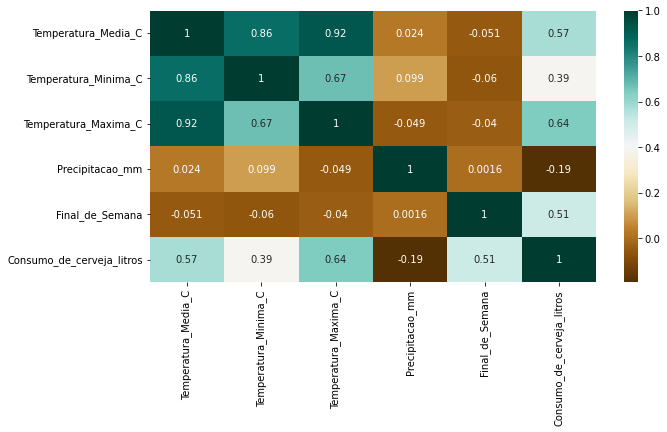

In [6]:
x = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(x,cmap="BrBG",annot=True)
x

In [7]:
dow=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==0])/5 #5 week days
weekend=sum(df.Consumo_de_cerveja_litros[df.Final_de_Semana==1])/2 #2 week ends
labels = ['Beer consumption by Weekdays','Beer consumption by weekend']
values = [dow,weekend]

<AxesSubplot:xlabel='Temperatura_Media_C'>

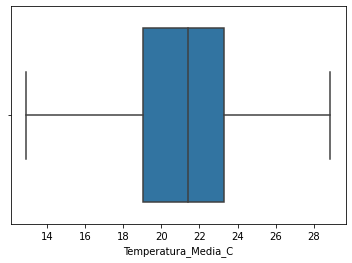

In [8]:
sns.boxplot(x=df['Temperatura_Media_C'])

<AxesSubplot:xlabel='Temperatura_Minima_C'>

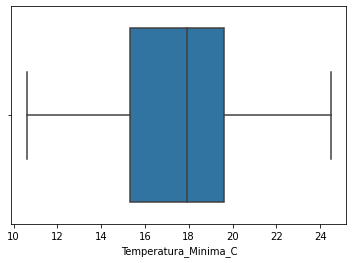

In [9]:
sns.boxplot(x=df['Temperatura_Minima_C'])

<AxesSubplot:xlabel='Temperatura_Maxima_C'>

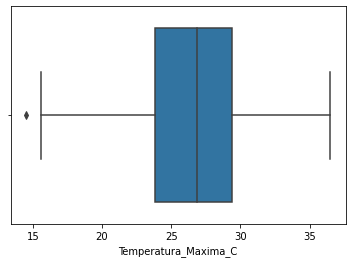

In [10]:
sns.boxplot(x=df['Temperatura_Maxima_C'])

<AxesSubplot:xlabel='Precipitacao_mm'>

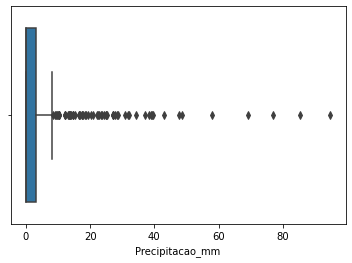

In [11]:
sns.boxplot(x=df['Precipitacao_mm'])

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperatura_Media_C          4.260
Temperatura_Minima_C         4.300
Temperatura_Maxima_C         5.600
Precipitacao_mm              3.200
Final_de_Semana              1.000
Consumo_de_cerveja_litros    6.623
dtype: float64


In [13]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(300, 7)

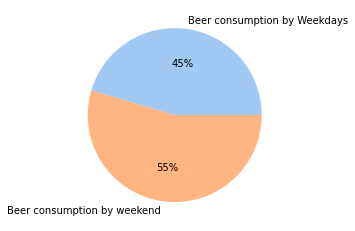

In [14]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [17]:
x = df.drop(['Data','Consumo_de_cerveja_litros','Temperatura_Minima_C','Precipitacao_mm'], axis=1)#.values
x.to_csv('x2022.csv')
x = x.values
#x = df['Temperatura_Maxima_C'].values
y = df['Consumo_de_cerveja_litros']#.values
y.to_csv('y2022.csv')
y= y.values